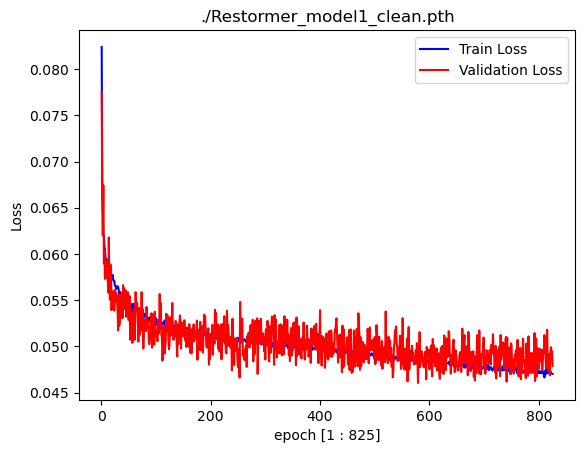

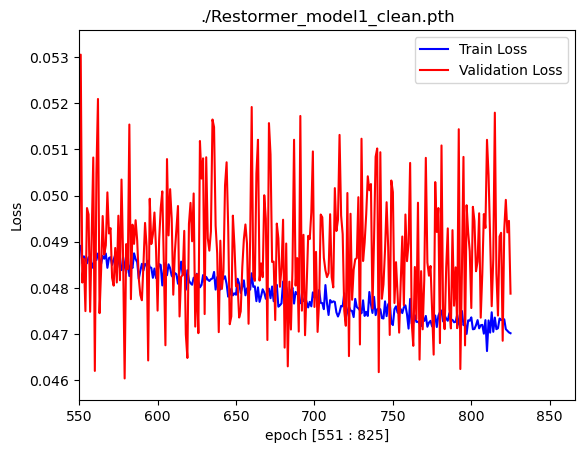

In [4]:
import torch
import matplotlib.pyplot as plt

model_list = ['DnCNN', 'ResNet18', 'RFDN', 'DRLN']
sel_model = model_list[3]
pth_num = 3
load_loss_pth ='./'+sel_model+'_model'+ str(pth_num)+'.pth'
# load_loss_pth ='./ResNet18_model2.pth'

#            [   0          1         2      3          4          5         6         7          8     ]
model_list = ['DnCNN', 'ResNet18', 'RFDN', 'DRLN', 'pix2pix', 'pix2pix2', 'swinir', 'KBNet', 'Restormer']

sel_model = model_list[8]
pth_num =1
noise = False
if noise: pth = '.pth'
else: pth = '_clean.pth' 
if sel_model=='pix2pix': pth='_g.pth'
save_record = False # 기록용 폴더에 있으면
load_loss_pth ='./'+sel_model+'_model'+str(pth_num)+pth
if save_record:
    load_loss_pth ='./기록용/'+sel_model+'/'+'best_'+sel_model+'_model'+str(pth_num)+pth



def plt_show(xrange=0):
    plt.plot(epoch, train_loss, label="Train Loss", color='b')
    plt.plot(epoch, val_loss, label="Validation Loss", color='r')
    plt.title(load_loss_pth)
    plt.legend(loc="best")   
    plt.ylabel("Loss")
    # plt.ylim(0,0.1)
    plt.xlabel(f'epoch [{epoch[0]} : {epoch[-1]}]') 
    if xrange:
        plt.xlim(xrange)
        plt.ylim(min([min(train_loss),min(val_loss)])*0.99,max([max(train_loss[xrange:]),max(val_loss[xrange:])])*1.01)
        plt.xlabel(f'epoch [{epoch[xrange]} : {epoch[-1]}]') 
    plt.show()

checkpoint = torch.load(load_loss_pth) # 경로에서 .pt 파일 불러오기
model = checkpoint['model']
epoch = checkpoint['epoch']
train_loss =checkpoint['train_loss']
val_loss = checkpoint['val_loss']
epochs =[]
for i in epoch:
    epochs.append(i + 1)
epoch = epochs
# plt.subplot(1,2,1)
plt_show()
# plt.subplot(1,2,2)
plt_show(int(epoch[-1]*4/6))



In [ ]:
if False:
    prange=range(50,1001,50)
    plt.plot(prange,train_mean,label="Train score",color="r")
    plt.plot(prange,test_mean,label="Test score",color="b")
    plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
    plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
    plt.legend(loc="best")
    plt.title("validation Curve with MLP")
    plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
    plt.ylim(0.9,1.01)
    plt.grid(axis='both')
    plt.show()

In [ ]:
if False:
    lfw = datasets.fetch_lfw_people(min_faces_per_person=70,resize=0.4)

    plt.figure(figsize=(20,5))

    for i in range(8):
        plt.subplot(1,8,i+1)
        plt.imshow(lfw.images[i],cmap=plt.cm.bone)
        plt.title(lfw.target_names[lfw.target[i]])

    plt.show()